# Multi-class and Multi-Label Classification

## Support Vector Machines


### (a)
Download the Anuran Calls (MFCCs) Data Set from: [https://archive.ics.uci.edu/ml/datasets/Anuran+Calls+%28MFCCs%29](https://archive.ics.uci.edu/ml/datasets/Anuran+Calls+%28MFCCs%29). Choose 70% of the data randomly as the training set.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, hamming_loss, silhouette_score, calinski_harabasz_score, classification_report
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import LinearSVC, SVC
from collections import Counter

import warnings
warnings.filterwarnings("ignore")

In [2]:
mfcc_data = pd.read_csv('../data/anuran+calls+mfccs/Frogs_MFCCs.csv')
mfcc_data = mfcc_data.drop(columns=['RecordID'])
training_data, testing_data = train_test_split(mfcc_data, test_size=0.3, shuffle=True)
training_data

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species
5887,0.404993,0.364419,1.000000,0.474072,0.253910,0.040975,0.060904,0.119791,0.090792,-0.081241,...,0.101872,0.013592,-0.108193,-0.017272,0.076640,0.153245,-0.025563,Hylidae,Hypsiboas,HypsiboasCordobae
4879,1.000000,0.449487,0.238761,0.602826,0.358910,0.129598,-0.097431,-0.039182,0.207236,0.293139,...,-0.223222,0.024864,0.148522,0.075787,-0.102845,-0.139279,0.001723,Hylidae,Dendropsophus,HylaMinuta
4883,1.000000,0.109148,0.071244,0.391431,0.240540,0.057216,-0.034906,-0.035764,0.087579,0.139343,...,-0.141666,-0.016700,0.076994,0.063351,0.012093,-0.049209,-0.064613,Hylidae,Dendropsophus,HylaMinuta
2332,1.000000,0.197186,0.090263,0.531075,0.243320,-0.036971,-0.157756,0.114944,0.279070,-0.029283,...,0.088535,0.138104,-0.027753,-0.059052,-0.027009,0.141262,0.115122,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
3735,1.000000,0.367953,0.305234,0.607703,0.185310,-0.014638,-0.130549,0.048542,0.352237,0.127484,...,0.081192,0.224925,-0.034826,-0.119625,-0.146038,-0.055570,0.182296,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,1.000000,0.601145,0.572088,0.470945,-0.112055,-0.022906,0.365012,0.074050,-0.238149,0.091435,...,-0.126189,0.057313,0.057302,-0.124625,-0.017639,0.139438,-0.034401,Leptodactylidae,Adenomera,AdenomeraAndre
2010,1.000000,0.243661,0.225241,0.595305,0.118425,0.021197,-0.043318,0.091577,0.255746,0.003463,...,0.141096,0.160429,-0.012892,-0.101989,-0.136732,0.035245,0.192766,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
199,1.000000,0.106721,-0.055922,0.163530,0.240516,0.216590,0.127683,-0.071955,0.001379,0.230575,...,0.063724,-0.102343,-0.172196,-0.130772,0.029156,0.106326,0.024964,Leptodactylidae,Adenomera,AdenomeraAndre
5860,0.623297,0.464006,1.000000,0.228656,-0.229628,0.283516,0.034141,0.005669,0.137443,0.179983,...,-0.035893,0.170114,0.179812,-0.015085,-0.047409,-0.039918,-0.022829,Hylidae,Hypsiboas,HypsiboasCordobae



### (b)
Each instance has three labels: Families, Genus, and Species. Each of the labels has multiple classes. We wish to solve a multi-class and multi-label problem. One of the most important approaches to multi-label classification is to train a classifier for each label (binary relevance). We first try this approach:



- **i.** Research exact match and hamming score/loss methods for evaluating multi-label classification and use them in evaluating the classifiers in this problem.

Reference: https://mmuratarat.github.io/2020-01-25/multilabel_classification_metrics 

------------------------------------

$ \text{Exact Match Ratio} = \frac{1}{N} \sum_{i=1}^N \mathbb{1}(\hat{y}_i = y_i) $

- Measures if all labels for an instance are predicted correctly.
- A disadvantage of this measure is that it does not distinguish between complete incorrect and partially correct which might be considered harsh
- High-precision tasks where all labels are equally important



$ \text{Hamming Loss} = \frac{1}{N \times L} \sum_{i=1}^N \sum_{j=1}^L \mathbb{1}(\hat{y}_{ij} \neq y_{ij}) $

- Measures the proportion of incorrectly predicted labels (label-level error)
- Tasks with many labels, focusing on individual label performance



$ \text{Hamming Score} = 1 - \text{Hamming Loss} $

- Measures the proportion of correctly predicted labels (label-level accuracy)
- Similar to Hamming Loss, but interpretable as accuracy

------------------------------------


- **ii.** Train a SVM for each of the labels, using Gaussian kernels and one versus all classifiers. Determine the weight of the SVM penalty and the width of the Gaussian Kernel using 10-fold cross-validation. You are welcome to try to solve the problem with both standardized and raw attributes and report the results.


In [3]:
X_train = training_data.drop(columns=['Family', 'Genus', 'Species'])
y_train = training_data.loc[:, ['Family', 'Genus', 'Species']]
X_test = testing_data.drop(columns=['Family', 'Genus', 'Species'])
y_test = testing_data.loc[:, ['Family', 'Genus', 'Species']]

In [4]:
param_grid = {
    'C': np.logspace(-2, 2, 5),
    'gamma': np.logspace(-3, 1, 5),
}

svm = SVC(kernel='rbf')

accuracies = []
hamming_losses = []
classification_reports = []
for i, label in enumerate(['Family', 'Genus', 'Species']):
    print(f'Running GridSearchCV for {label}...')
    
    grid_search = GridSearchCV(svm, param_grid, cv=10, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train[label])
    
    print(f'Best Parameters for {label}: {grid_search.best_params_}')
    print(f'Best Score for {label}: {grid_search.best_score_}')
    
    y_pred = grid_search.best_estimator_.predict(X_test)
    
    acc = accuracy_score(y_test[label], y_pred)
    accuracies.append(acc)
    print(f'Accuracy for {label}: {acc}\n')
    
    
    hamming = hamming_loss(y_test[label], y_pred)
    hamming_losses.append(hamming)
    report = classification_report(y_test[label], y_pred)
    classification_reports.append((label, report))

# Overall results
print('-' * 50)
print('Summary:')
print(f'Overall Accuracy: {np.mean(accuracies)}')
print(f'Average Hamming Loss: {np.mean(hamming_losses)}')
for label, report in classification_reports:
    print(f'Classification Report for {label}:\n{report}')
    

Running GridSearchCV for Family...
Best Parameters for Family: {'C': 100.0, 'gamma': 1.0}
Best Score for Family: 0.9898734576666982
Accuracy for Family: 0.9930523390458545

Running GridSearchCV for Genus...
Best Parameters for Genus: {'C': 100.0, 'gamma': 1.0}
Best Score for Genus: 0.9878861750134116
Accuracy for Genus: 0.9930523390458545

Running GridSearchCV for Species...
Best Parameters for Species: {'C': 100.0, 'gamma': 1.0}
Best Score for Species: 0.988283394868882
Accuracy for Species: 0.9916628068550255

--------------------------------------------------
Summary:
Overall Accuracy: 0.9925891616489114
Average Hamming Loss: 0.007410838351088467
Classification Report for Family:
                 precision    recall  f1-score   support

      Bufonidae       0.88      0.95      0.91        22
  Dendrobatidae       0.99      1.00      1.00       163
        Hylidae       1.00      0.98      0.99       637
Leptodactylidae       0.99      1.00      1.00      1337

       accuracy      

- **iii.** Repeat 1(b)ii with L1-penalized SVMs. Remember to standardize the attributes. Determine the weight of the SVM penalty using 10-fold cross-validation.


In [5]:
param_grid = {
    'C': np.logspace(-2, 2, 5),
}

svm = LinearSVC(penalty='l1', dual=False)

accuracies = []
hamming_losses = []
classification_reports = []
for i, label in enumerate(['Family', 'Genus', 'Species']):
    print(f'Running GridSearchCV for {label}...')
    grid_search = GridSearchCV(svm, param_grid, cv=10, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train[label])
    
    print(f'Best Parameters for {label}: {grid_search.best_params_}')
    print(f'Best Score for {label}: {grid_search.best_score_}')
    
    y_pred = grid_search.best_estimator_.predict(X_test)
    
    acc = accuracy_score(y_test[label], y_pred)
    accuracies.append(acc)
    print(f'Accuracy for {label}: {acc}\n')
    
    hamming = hamming_loss(y_test[label], y_pred)
    hamming_losses.append(hamming)
    report = classification_report(y_test[label], y_pred)
    classification_reports.append((label, report))

# Overall results
print('-' * 50)
print('Summary:')
print(f'Overall Accuracy: {np.mean(accuracies)}')
print(f'Average Hamming Loss: {np.mean(hamming_losses)}')
for label, report in classification_reports:
    print(f'Classification Report for {label}:\n{report}')
    

Running GridSearchCV for Family...


/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the n

Best Parameters for Family: {'C': 100.0}
Best Score for Family: 0.9356630060904415
Accuracy for Family: 0.936544696618805

Running GridSearchCV for Genus...


/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the n

Best Parameters for Genus: {'C': 100.0}
Best Score for Genus: 0.9537335510745054
Accuracy for Genus: 0.9546086150995832

Running GridSearchCV for Species...


/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the n

Best Parameters for Species: {'C': 100.0}
Best Score for Species: 0.9594906749976333
Accuracy for Species: 0.9615562760537286

--------------------------------------------------
Summary:
Overall Accuracy: 0.9509031959240389
Average Hamming Loss: 0.04909680407596109
Classification Report for Family:
                 precision    recall  f1-score   support

      Bufonidae       0.00      0.00      0.00        22
  Dendrobatidae       0.89      0.90      0.89       163
        Hylidae       0.91      0.91      0.91       637
Leptodactylidae       0.96      0.97      0.96      1337

       accuracy                           0.94      2159
      macro avg       0.69      0.69      0.69      2159
   weighted avg       0.93      0.94      0.93      2159

Classification Report for Genus:
               precision    recall  f1-score   support

    Adenomera       0.97      0.99      0.98      1258
     Ameerega       0.93      0.96      0.95       163
Dendropsophus       0.95      0.60      0.

- **iv.** Repeat 1(b)iii by using SMOTE or any other method you know to remedy class imbalance. Report your conclusions about the classifiers you trained.


In [6]:
smote = SMOTE()

param_grid = {
    'C': np.logspace(-2, 2, 5),
}

svm = LinearSVC(penalty='l1', dual=False)

accuracies = []
hamming_losses = []
classification_reports = []
for i, label in enumerate(['Family', 'Genus', 'Species']):
    print(f'Running GridSearchCV for {label}...')
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train[label])
    grid_search = GridSearchCV(svm, param_grid, cv=10, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train_resampled, y_train_resampled)
    
    print(f'Best Parameters for {label}: {grid_search.best_params_}')
    print(f'Best Score for {label}: {grid_search.best_score_}')
    
    y_pred = grid_search.best_estimator_.predict(X_test)
    
    acc = accuracy_score(y_test[label], y_pred)
    accuracies.append(acc)
    print(f'Accuracy for {label}: {acc}\n')
    
    hamming = hamming_loss(y_test[label], y_pred)
    hamming_losses.append(hamming)
    report = classification_report(y_test[label], y_pred)
    classification_reports.append((label, report))

# Overall results
print('-' * 50)
print('Summary:')
print(f'Overall Accuracy: {np.mean(accuracies)}')
print(f'Average Hamming Loss: {np.mean(hamming_losses)}')
for label, report in classification_reports:
    print(f'Classification Report for {label}:\n{report}')
    

Running GridSearchCV for Family...


/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the n

Best Parameters for Family: {'C': 100.0}
Best Score for Family: 0.9485075470482845
Accuracy for Family: 0.9161648911533117

Running GridSearchCV for Genus...


/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the n

Best Parameters for Genus: {'C': 100.0}
Best Score for Genus: 0.9571235409494492
Accuracy for Genus: 0.9092172301991662

Running GridSearchCV for Species...


/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the n

Best Parameters for Species: {'C': 100.0}
Best Score for Species: 0.9609176566980745
Accuracy for Species: 0.9550717924965262

--------------------------------------------------
Summary:
Overall Accuracy: 0.9268179712830014
Average Hamming Loss: 0.0731820287169986
Classification Report for Family:
                 precision    recall  f1-score   support

      Bufonidae       0.31      0.86      0.46        22
  Dendrobatidae       0.76      0.98      0.85       163
        Hylidae       0.93      0.88      0.90       637
Leptodactylidae       0.96      0.93      0.94      1337

       accuracy                           0.92      2159
      macro avg       0.74      0.91      0.79      2159
   weighted avg       0.93      0.92      0.92      2159

Classification Report for Genus:
               precision    recall  f1-score   support

    Adenomera       0.98      0.90      0.94      1258
     Ameerega       0.82      0.96      0.89       163
Dendropsophus       0.62      0.79      0.7

- **v. Extra Practice:** Study the Classifier Chain method and apply it to the above problem.
- **vi. Extra Practice:** Research how confusion matrices, precision, recall, ROC, and AUC are defined for multi-label classification and compute them for the classifiers you trained above.



## K-Means Clustering

Monte-Carlo Simulation: Perform the following procedures 50 times, and report the average and standard deviation of the 50 Hamming Distances that you calculate.



### (a)
Use k-means clustering on the whole Anuran Calls (MFCCs) Data Set (do not split the data into train and test, as we are not performing supervised learning in this exercise). Choose $ k \in \{1, 2, \dots, 50\} $ automatically based on one of the methods provided in the slides (CH or Gap Statistics or scree plots or Silhouettes) or any other method you know.


In [7]:
mfcc_data = pd.read_csv('../data/anuran+calls+mfccs/Frogs_MFCCs.csv')
mfcc_data = mfcc_data.drop(columns=['RecordID'])
mfcc_features = mfcc_data.drop(columns=['Family', 'Genus', 'Species'])
mfcc_labels = mfcc_data.loc[:, ['Family', 'Genus', 'Species']]

In [8]:
k_values = range(1, 51)

inertia = []
silhouette_scores = []
ch_scores = []
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(mfcc_features)
    inertia.append(kmeans.inertia_) 
    if k > 1:
        silhouette_scores.append(silhouette_score(mfcc_features, kmeans.labels_))
        ch_scores.append(calinski_harabasz_score(mfcc_features, kmeans.labels_))

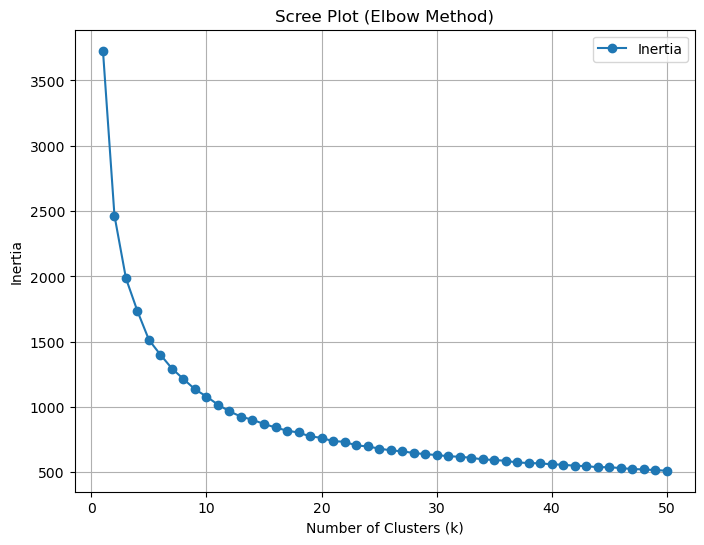

In [9]:
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia, marker='o', label='Inertia')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Scree Plot (Elbow Method)')
plt.legend()
plt.grid(True)
plt.show()

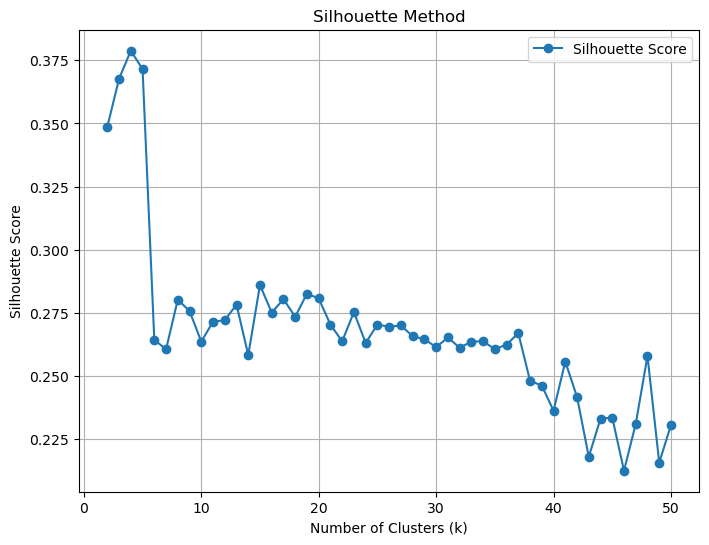

Optimal k based on Silhouette Score: 4


In [10]:
plt.figure(figsize=(8, 6))
plt.plot(k_values[1:], silhouette_scores, marker='o', label='Silhouette Score')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')
plt.legend()
plt.grid(True)
plt.show()

optimal_k_silhouette = k_values[silhouette_scores.index(max(silhouette_scores))+1]
print(f'Optimal k based on Silhouette Score: {optimal_k_silhouette}')

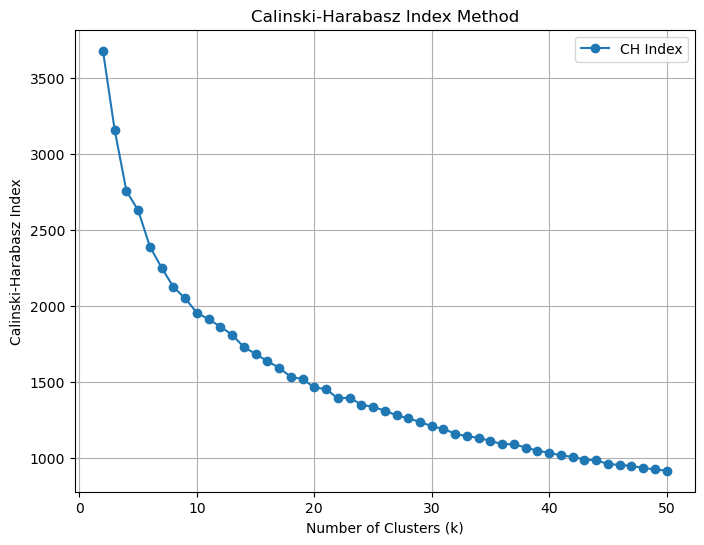

Optimal k based on Calinski-Harabasz Index: 2


In [11]:
plt.figure(figsize=(8, 6))
plt.plot(k_values[1:], ch_scores, marker='o', label='CH Index')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Calinski-Harabasz Index')
plt.title('Calinski-Harabasz Index Method')
plt.legend()
plt.grid(True)
plt.show()

optimal_k_ch = k_values[ch_scores.index(max(ch_scores))+1]
print(f'Optimal k based on Calinski-Harabasz Index: {optimal_k_ch}')


### (b)
In each cluster, determine which family is the majority by reading the true labels. Repeat for genus and species.


In [12]:
cluster_labels = kmeans.labels_
print(f'Cluster Labels: {cluster_labels}')

data = pd.DataFrame({
    'Family': mfcc_labels['Family'],
    'Genus': mfcc_labels['Genus'],
    'Species': mfcc_labels['Species'],
    'Cluster': cluster_labels
})
data

Cluster Labels: [ 3  3  3 ... 23 23 23]


,Family,Genus,Species,Cluster
0,Leptodactylidae,Adenomera,AdenomeraAndre,3
1,Leptodactylidae,Adenomera,AdenomeraAndre,3
2,Leptodactylidae,Adenomera,AdenomeraAndre,3
3,Leptodactylidae,Adenomera,AdenomeraAndre,3
4,Leptodactylidae,Adenomera,AdenomeraAndre,3
...,...,...,...,...
7190,Hylidae,Scinax,ScinaxRuber,23
7191,Hylidae,Scinax,ScinaxRuber,23
7192,Hylidae,Scinax,ScinaxRuber,23
7193,Hylidae,Scinax,ScinaxRuber,23


In [13]:
cluster_labels = kmeans.labels_

data = pd.DataFrame({
    'Family': mfcc_labels['Family'],
    'Genus': mfcc_labels['Genus'],
    'Species': mfcc_labels['Species'],
    'Cluster': cluster_labels
})

majority_classes = {}

for cluster in data['Cluster'].unique():
    cluster_data = data[data['Cluster'] == cluster]
    
    majority_family = Counter(cluster_data['Family']).most_common(1)[0]
    majority_genus = Counter(cluster_data['Genus']).most_common(1)[0]
    majority_species = Counter(cluster_data['Species']).most_common(1)[0]
    
    majority_classes[cluster] = {
        'Family': majority_family[0],
        'Family Count': majority_family[1],
        'Genus': majority_genus[0],
        'Genus Count': majority_genus[1],
        'Species': majority_species[0],
        'Species Count': majority_species[1]
    }

print("Majority classes in each cluster:")
for cluster, classes in sorted(majority_classes.items()):
    print(f"Cluster {cluster}:")
    print(f"  Family: {classes['Family']} ({classes['Family Count']} samples)")
    print(f"  Genus: {classes['Genus']} ({classes['Genus Count']} samples)")
    print(f"  Species: {classes['Species']} ({classes['Species Count']} samples)")
    print()

Majority classes in each cluster:
Cluster 0:
  Family: Leptodactylidae (302 samples)
  Genus: Adenomera (302 samples)
  Species: AdenomeraHylaedactylus (302 samples)

Cluster 1:
  Family: Hylidae (447 samples)
  Genus: Hypsiboas (446 samples)
  Species: HypsiboasCordobae (446 samples)

Cluster 2:
  Family: Hylidae (111 samples)
  Genus: Hypsiboas (106 samples)
  Species: HypsiboasCinerascens (100 samples)

Cluster 3:
  Family: Leptodactylidae (117 samples)
  Genus: Adenomera (117 samples)
  Species: AdenomeraAndre (117 samples)

Cluster 4:
  Family: Hylidae (35 samples)
  Genus: Hypsiboas (32 samples)
  Species: HypsiboasCinerascens (17 samples)

Cluster 5:
  Family: Leptodactylidae (250 samples)
  Genus: Adenomera (250 samples)
  Species: AdenomeraHylaedactylus (250 samples)

Cluster 6:
  Family: Hylidae (132 samples)
  Genus: Hypsiboas (126 samples)
  Species: HypsiboasCordobae (126 samples)

Cluster 7:
  Family: Dendrobatidae (59 samples)
  Genus: Ameerega (59 samples)
  Species: Am


### (c)
Now for each cluster you have a majority label triplet (family, genus, species). Calculate the average Hamming distance, Hamming score, and Hamming loss between the true labels and the labels assigned by clusters.


In [14]:
predicted_labels = []
for cluster in data['Cluster']:
    majority_family = majority_classes[cluster]['Family']
    majority_genus = majority_classes[cluster]['Genus']
    majority_species = majority_classes[cluster]['Species']
    predicted_labels.append([majority_family, majority_genus, majority_species])

predicted_labels = np.array(predicted_labels)
true_labels = data[['Family', 'Genus', 'Species']].values

hamming_distances = np.sum(predicted_labels != true_labels, axis=1)
average_hamming_distance = np.mean(hamming_distances)

total_labels = true_labels.size
mismatched_labels = np.sum(predicted_labels != true_labels)
hamming_loss_value = mismatched_labels / total_labels
hamming_score = 1 - hamming_loss_value

print("Average Hamming Distance:", average_hamming_distance)
print("Hamming Loss:", hamming_loss_value)
print("Hamming Score:", hamming_score)

Average Hamming Distance: 0.13231410701876303
Hamming Loss: 0.04410470233958768
Hamming Score: 0.9558952976604124



## 3. ISLR 12.6.2


### Clustering with a Dissimilarity Matrix

Suppose that we have four observations, for which we compute a dissimilarity matrix, given by:

$
\begin{bmatrix}
0 & 0.3 & 0.4 & 0.7 \\
0.3 & 0 & 0.5 & 0.8 \\
0.4 & 0.5 & 0 & 0.45 \\
0.7 & 0.8 & 0.45 & 0
\end{bmatrix}
$

For instance, the dissimilarity between the first and second observations is 0.3, and the dissimilarity between the second and fourth observations is 0.8.





### (a) 
On the basis of this dissimilarity matrix, sketch the dendrogram that results from hierarchically clustering these four observations using **complete linkage**. Be sure to indicate on the plot the height at which each fusion occurs, as well as the observations corresponding to each leaf in the dendrogram.





### (b) 
Repeat (a), this time using **single linkage** clustering.





### (c) 
Suppose that we cut the dendrogram obtained in (a) such that two clusters result. Which observations are in each cluster?





### (d) 
Suppose that we cut the dendrogram obtained in (b) such that two clusters result. Which observations are in each cluster?





### (e) 
It is mentioned in the chapter that at each fusion in the dendrogram, the position of the two clusters being fused can be swapped without changing the meaning of the dendrogram. Draw a dendrogram that is equivalent to the dendrogram in (a), for which two or more of the leaves are repositioned, but for which the meaning of the dendrogram is the same.

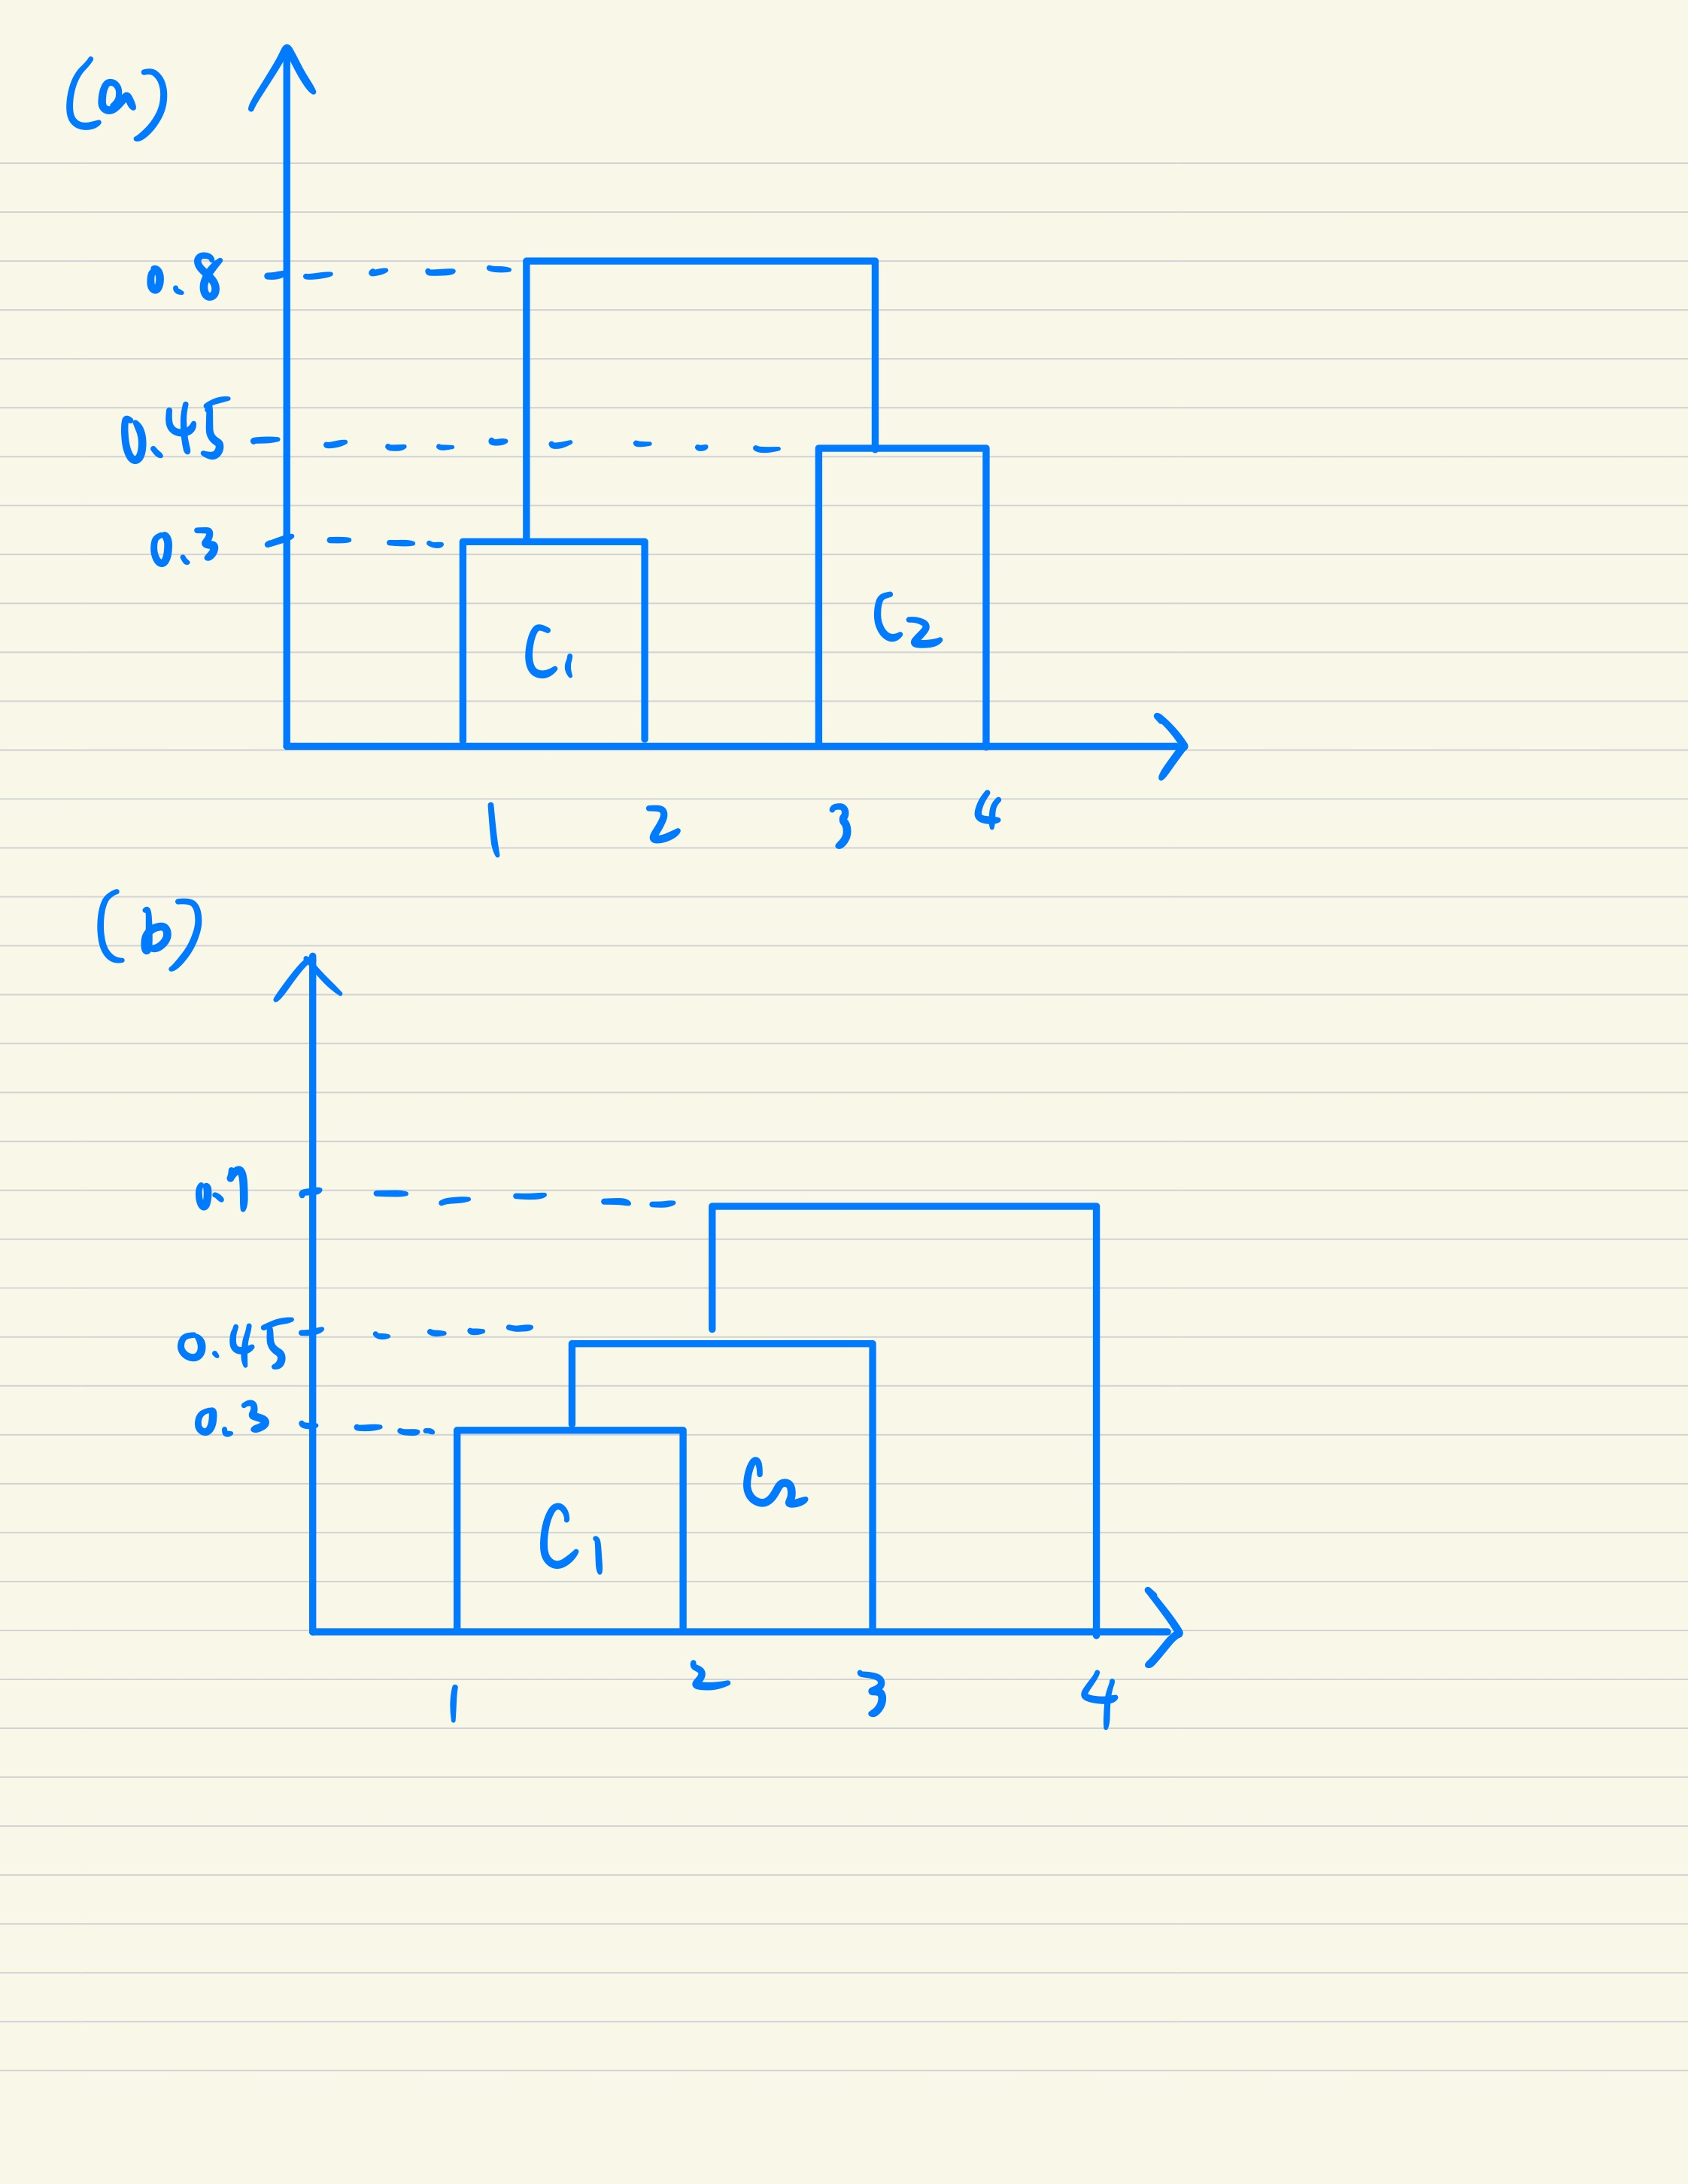

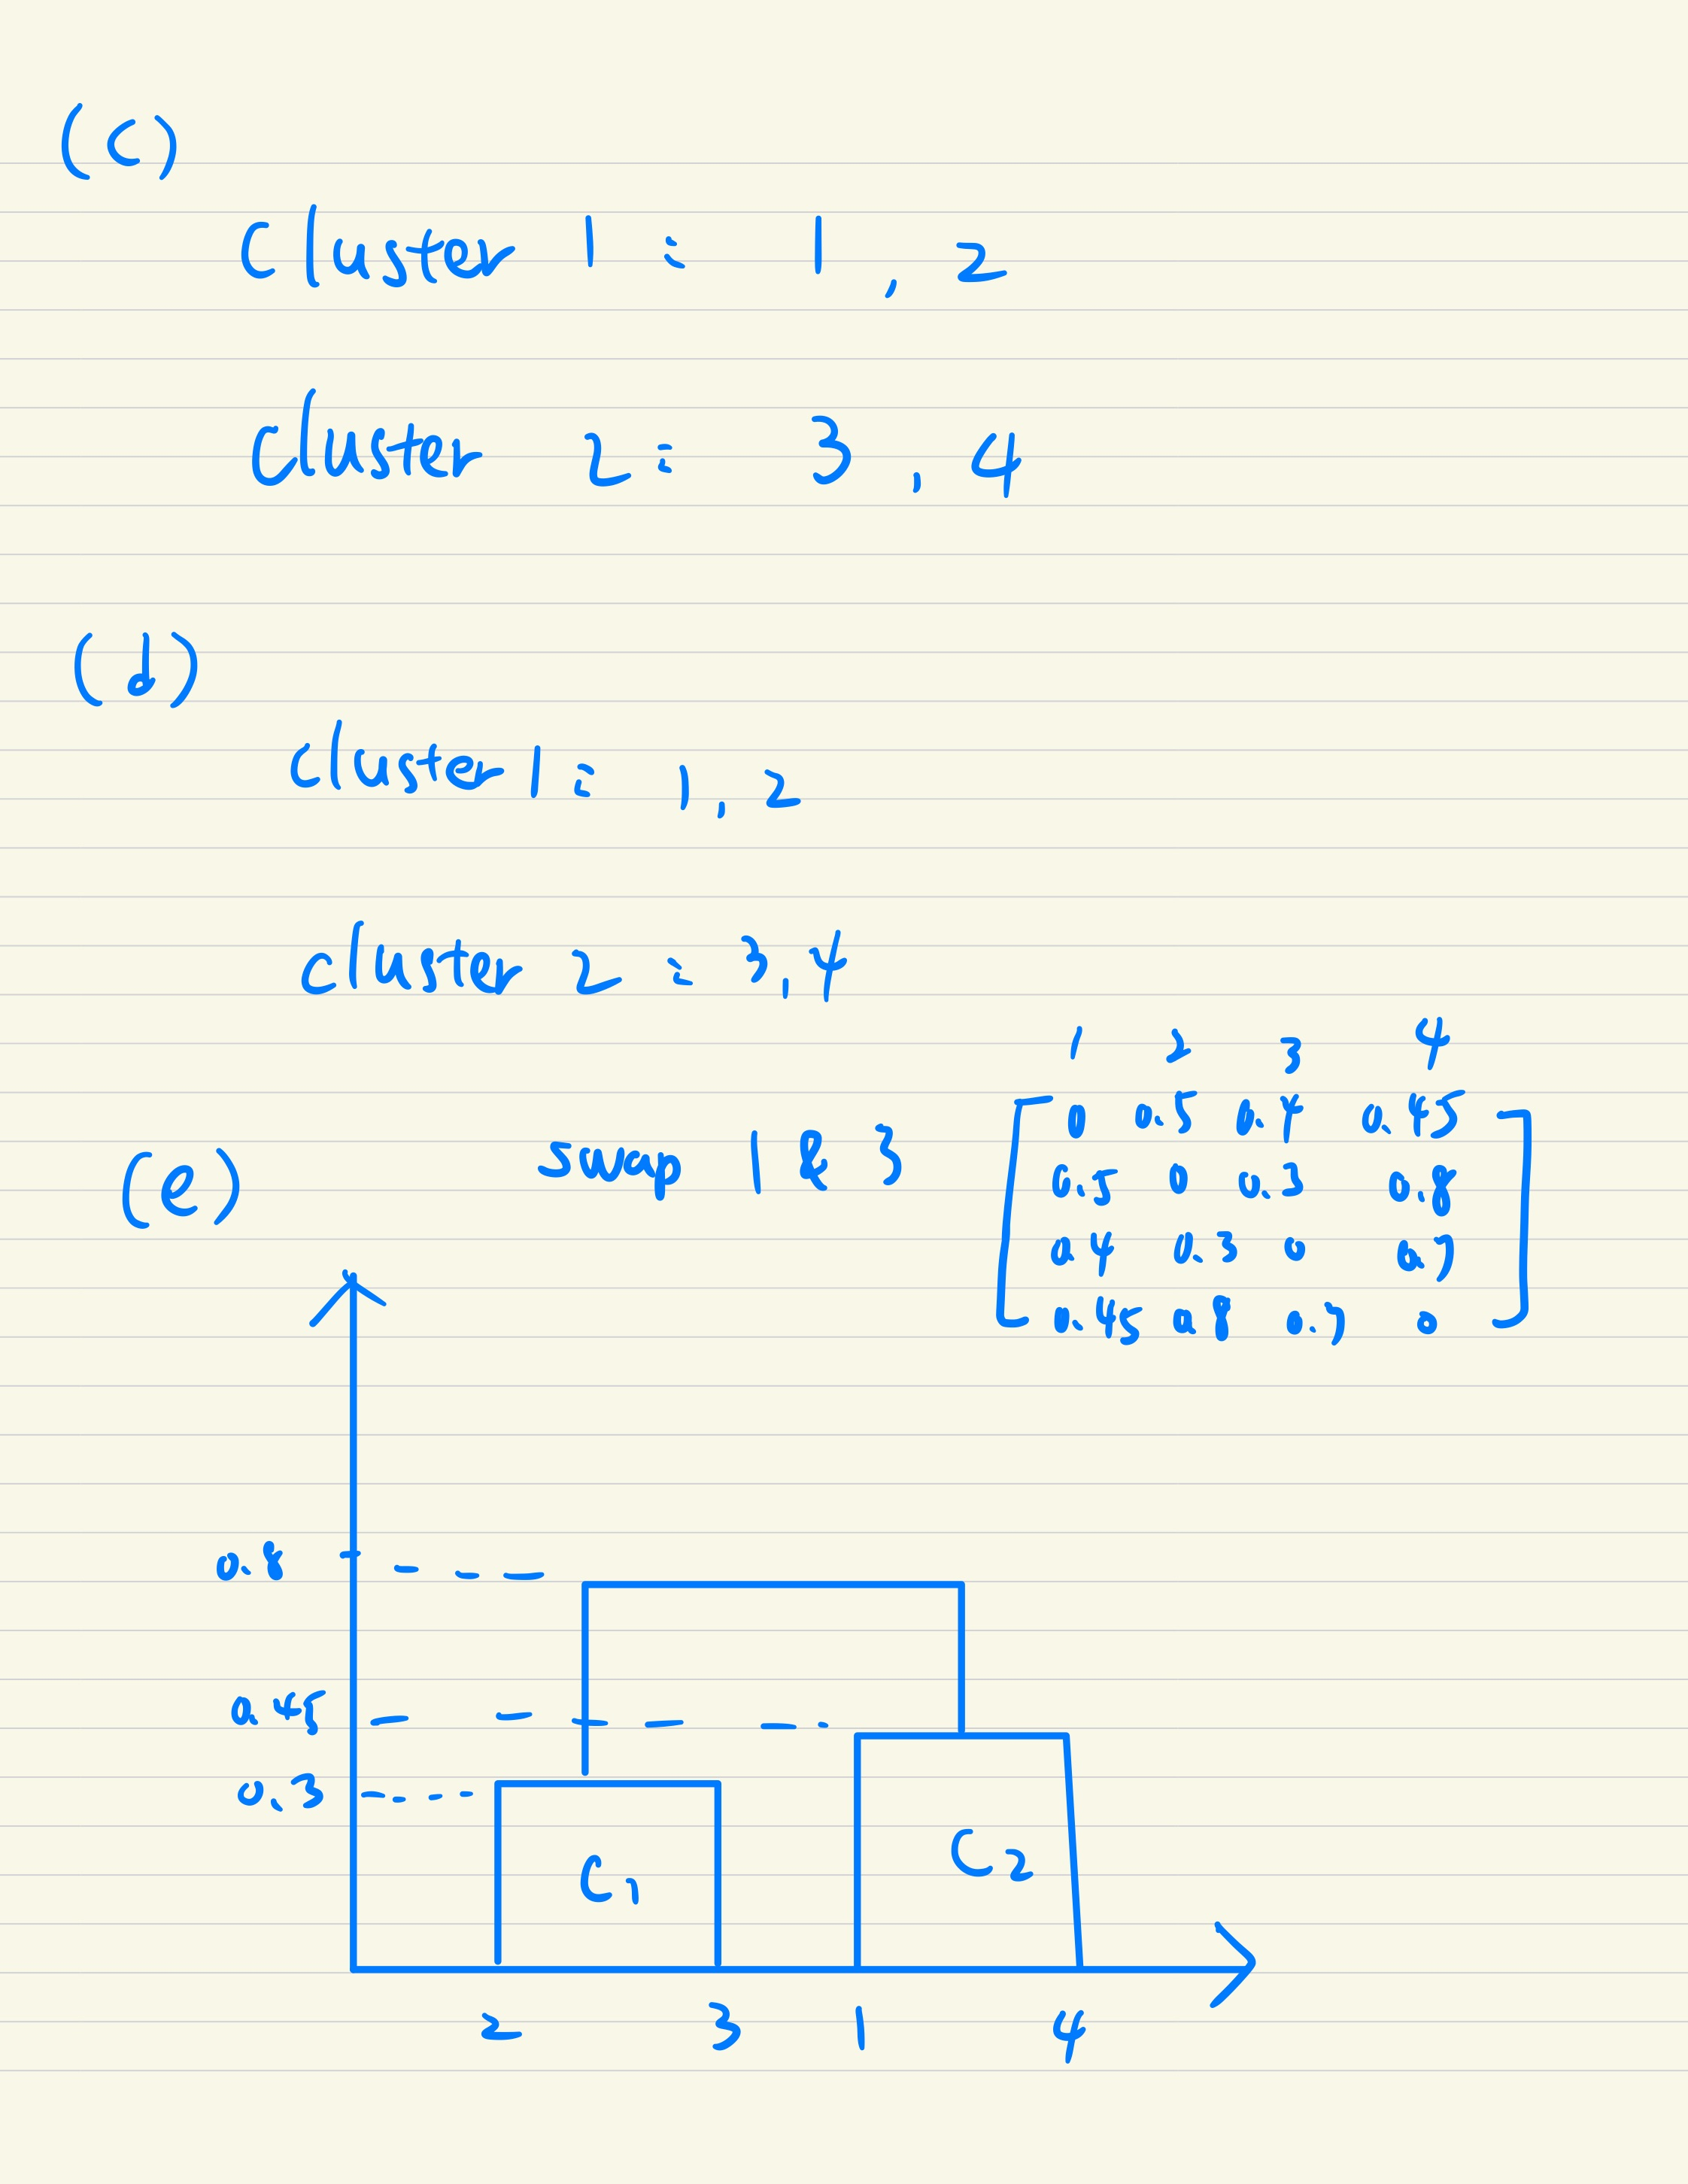

In [15]:
from IPython.display import Image, display

display(Image(filename='../img/ab.jpg'))
display(Image(filename='../img/cde.jpg'))